In [ ]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import alpha_vantage as av_api
from alpha_vantage.alphavantage import AlphaVantage
from alpha_vantage.techindicators import TechIndicators as ti
from alpha_vantage.alphavantage import csv
from alpha_vantage.timeseries import TimeSeries as ts
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText



In [ ]:
# Load .env enviroment variables
load_dotenv()

In [ ]:
# Set email variables
sender_password = os.getenv("SENDER_PASSWORD")
sender_address = 'boltleyfool@gmail.com' 
receiver_address = 'mauricedure23@gmail.com'

In [ ]:
# #Specify paper trading environment & set API keys
# alpaca_paper_endpoint = os.getenv("ALPACA_PAPER_ENDPOINT")
# alpaca_api_key = os.getenv("ALPACA_API_KEY")
# alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# sender_password = os.getenv("Email_Password")

# #Create API object
# alpaca_api = tradeapi.REST(
#     alpaca_api_key,
#     alpaca_secret_key,
#     alpaca_paper_endpoint,
#     api_version='v2'
# )


# #Get Account
# account = alpaca_api.get_account()

# #Get portfolio and clock
# portfolio=alpaca_api.list_positions()
# clock=alpaca_api.get_clock()

In [ ]:
## Create AlphaVantage Technical Indicators API object and assign indicator variables

In [26]:
# Configure AlphaVantage API object and query variable
api_key = os.getenv('ALPHAVANTAGE_API_KEY')

base_url = 'https://www.alphavantage.co/query?'
params = {'function': 'TIME_SERIES_DAILY_ADJUSTED',
         'symbol': 'aapl',
        'apikey': api_key}

app = ti(output_format='pandas')

aapl_macd = app.get_macd('aapl', fastperiod=12, slowperiod=26, signalperiod=9)

print(aapl_macd)

#Plot the MACD Indicator as a graph



(            MACD_Hist    MACD  MACD_Signal
date                                      
2021-02-12    -0.4786  1.3923       1.8708
2021-02-11    -0.4644  1.5261       1.9905
2021-02-10    -0.4075  1.6991       2.1066
2021-02-09    -0.3397  1.8688       2.2084
2021-02-08    -0.2983  1.9950       2.2933
...               ...     ...          ...
1999-12-23    -0.0094  0.0201       0.0295
1999-12-22    -0.0122  0.0196       0.0318
1999-12-21    -0.0134  0.0214       0.0349
1999-12-20    -0.0168  0.0215       0.0382
1999-12-17    -0.0177  0.0247       0.0424

[5323 rows x 3 columns], {'1: Symbol': 'aapl', '2: Indicator': 'Moving Average Convergence/Divergence (MACD)', '3: Last Refreshed': '2021-02-12', '4: Interval': 'daily', '5.1: Fast Period': 12, '5.2: Slow Period': 26, '5.3: Signal Period': 9, '6: Series Type': 'close', '7: Time Zone': 'US/Eastern'})


(                         RSI
date                        
2021-01-05 18:30:00  44.6064
2021-01-05 19:00:00  44.3871
2021-01-05 19:30:00  44.3871
2021-01-05 20:00:00  44.1625
2021-01-06 04:30:00  38.9517
...                      ...
2021-02-12 18:00:00  51.6343
2021-02-12 18:30:00  51.6343
2021-02-12 19:00:00  51.1436
2021-02-12 19:30:00  51.2378
2021-02-12 20:00:00  51.2856

[868 rows x 1 columns], {'1: Symbol': 'aapl', '2: Indicator': 'Relative Strength Index (RSI)', '3: Last Refreshed': '2021-02-12 20:00:00', '4: Interval': '30min', '5: Time Period': 60, '6: Series Type': 'close, open, high, low', '7: Time Zone': 'US/Eastern Time'})


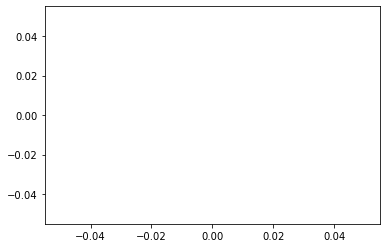

In [34]:
app_2 = ti(output_format='pandas')

aapl_rsi = app.get_rsi('aapl', interval= '30min', time_period=60, series_type=['close, open, high, low'])

fig, ax2 = plt.subplots()
ax2.plot()

aapl_rsi
print(aapl_rsi)

In [37]:
aapl_rsi=pd.DataFrame(aapl_rsi)

In [41]:
# aapl_rsi.columns0("RSI")

TypeError: 'RangeIndex' object is not callable

In [42]:
app_3 = ti(output_format='pandas')

aapl_obv = app.get_obv('aapl', interval = '30min')

print(aapl_obv)

(                             OBV
date                            
2021-01-04 04:30:00      83035.0
2021-01-04 05:00:00      53941.0
2021-01-04 05:30:00      -1806.0
2021-01-04 06:00:00     105704.0
2021-01-04 06:30:00      89922.0
...                          ...
2021-02-12 18:00:00 -164490666.0
2021-02-12 18:30:00 -164518253.0
2021-02-12 19:00:00 -164543778.0
2021-02-12 19:30:00 -164563253.0
2021-02-12 20:00:00 -164513528.0

[928 rows x 1 columns], {'1: Symbol': 'aapl', '2: Indicator': 'On Balance Volume (OBV)', '3: Last Refreshed': '2021-02-12 20:00:00', '4: Interval': '30min', '5: Time Zone': 'US/Eastern Time'})


In [43]:
app_4 = ti(output_format='pandas')

aapl_sma = app.get_sma('aapl', interval= '30min', time_period=60, series_type=['close, open, high, low'])

print(aapl_sma)

(                          SMA
date                         
2021-01-05 18:00:00  130.0835
2021-01-05 18:30:00  130.0466
2021-01-05 19:00:00  130.0000
2021-01-05 19:30:00  129.9545
2021-01-05 20:00:00  129.9048
...                       ...
2021-02-12 18:00:00  134.6672
2021-02-12 18:30:00  134.6697
2021-02-12 19:00:00  134.6664
2021-02-12 19:30:00  134.6617
2021-02-12 20:00:00  134.6564

[869 rows x 1 columns], {'1: Symbol': 'aapl', '2: Indicator': 'Simple Moving Average (SMA)', '3: Last Refreshed': '2021-02-12 20:00:00', '4: Interval': '30min', '5: Time Period': 60, '6: Series Type': 'close, open, high, low', '7: Time Zone': 'US/Eastern'})


In [44]:
app_5 = ti(output_format='pandas')

aapl_ema = app.get_ema('aapl', interval= '30min', time_period=60, series_type=['close, open, high, low'])

print(aapl_ema)

(                          EMA
date                         
2021-01-05 18:00:00  130.0835
2021-01-05 18:30:00  130.1006
2021-01-05 19:00:00  130.1138
2021-01-05 19:30:00  130.1266
2021-01-05 20:00:00  130.1357
...                       ...
2021-02-12 18:00:00  134.7104
2021-02-12 18:30:00  134.7330
2021-02-12 19:00:00  134.7516
2021-02-12 19:30:00  134.7702
2021-02-12 20:00:00  134.7886

[869 rows x 1 columns], {'1: Symbol': 'aapl', '2: Indicator': 'Exponential Moving Average (EMA)', '3: Last Refreshed': '2021-02-12 20:00:00', '4: Interval': '30min', '5: Time Period': 60, '6: Series Type': 'close, open, high, low', '7: Time Zone': 'US/Eastern'})


In [46]:
app_6 = ti(output_format='pandas')

aapl_bbands = app.get_bbands('aapl', interval= '30min', time_period=60, series_type=['close, open, high, low'])

print(aapl_bbands)

aapl_bbands.plot()

(                     Real Middle Band  Real Lower Band  Real Upper Band
date                                                                   
2021-02-12 20:00:00          134.6564         133.6007         135.7121
2021-02-12 19:30:00          134.6617         133.5894         135.7340
2021-02-12 19:00:00          134.6664         133.5803         135.7525
2021-02-12 18:30:00          134.6697         133.5747         135.7648
2021-02-12 18:00:00          134.6672         133.5782         135.7563
...                               ...              ...              ...
2021-01-05 20:00:00          129.9048         126.7328         133.0768
2021-01-05 19:30:00          129.9545         126.6614         133.2477
2021-01-05 19:00:00          130.0000         126.6041         133.3958
2021-01-05 18:30:00          130.0466         126.5491         133.5441
2021-01-05 18:00:00          130.0835         126.5171         133.6499

[869 rows x 3 columns], {'1: Symbol': 'aapl', '2: Indicator': 

AttributeError: 'tuple' object has no attribute 'plot'

In [ ]:
#Trading algorithm
def MKG_trading_algo():
    if clock.is_open == True:
        if bool(portfolio) == False:
            #ex. MACD rises etc.
            if []:
                api.submit_order(symbol = stockDEF, qty = number_of_shares,side = 'buy',type = 'market' ,time_in_force = 'day')
                mail_content = "Trades have been made, XYZ..."
            #ex.MACD drops etc.
            elif []:
                api.submit_order(stockABC = stockDEF, qty = number_of_shares,side = 'sell',type = 'market', time_in_force ='day')
                mail_content = "Trades have been made, XYZ..." 
        else:
            if []:
                api.close_position(stockABC)
                api.open_position(stockDEF)
                mail_content = "XYZ positions have been traded"
            else:
                mail_content = "No trades were made, positions remains the same"
                pass
    else:
        mail_content = "The Market is Closed"
        
    #Set email sender and receiver
    sender_address = 'boltleyfool@gmail.com' 
    receiver_address='boltleyfool@gmail.com'
    
    #Setup MIME
    message=MIMEMultipart()
    message['From']='Botley'
    message['To']=receiver_address
    message['Subject']='Trade Notification'
    
    #The body and the attachments for the mail
    message.attach(MIMEText(mail_content,'plain'))
    
    #Create SMTP session using gmail and port 587
    session = smtplib.SMTP('smtp.gmail.com', 587)
    
     #Start transport layer security
    session.starttls()
    
    #Login
    session.login(sender_address,sender_password)
    
    #Set Text
    text=message.as_string()
    
    #Send the email
    session.sendmail(sender_address,receiver_address,text)
    session.quit()
    
    done='Email Sent'

    return done